In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

### Main idea

$$
\begin{eqnarray}
y &\approx& \alpha G(x) \\
-2\log y &\approx& \frac{x^2}{\sigma^2} - \frac{2x\mu}{\sigma^2} + K(\alpha, \mu, \sigma^2) \\
A,B,C &=& \mathrm{polyfit}_2(x, y) \\
\sigma^2 &\approx& \frac{1}{A} \\
\mu &\approx& \frac{B}{2A}
\end{eqnarray}$$

In [7]:
x = np.random.uniform(0, 1, 100)
y = 2 * x + 1
np.polyfit(x, y, 2)

array([1.76218327e-15, 2.00000000e+00, 1.00000000e+00])

In [8]:
def fit_gaussian_quadratic(x, y):
    yMin = np.min(y)
    yMax = np.max(y)
    delta = yMax-yMin
    yThr = y - yMin + 0.01*delta
    negll2 = -2.0*np.log(yThr)
    a,b,c = np.polyfit(x, negll2, 2)
    return b/(2.0*a), 1.0/a

True 30 25
Src (-32.757778375604985, 748.3529671572746)
Noise (-32.83405714835245, 1158.55859516248)
Filter (-29.922249207562512, 766.3754339657943)


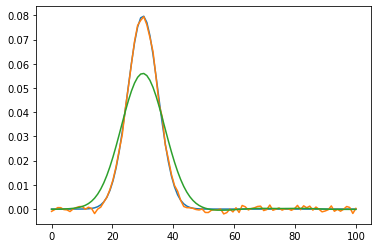

In [19]:
gau = lambda mu, s2: np.exp(-(mu**2)/s2/2) / np.sqrt(2 * np.pi * s2)

muTrue = 30
s2True = 5**2

x = np.linspace(0, 100, 100)
y = gau(x - muTrue, s2True)
ynoisy = y + np.random.normal(0, 0.001, 100)

stdFilter = 5
yfiltered = gaussian_filter(ynoisy, stdFilter)

print("True", muTrue, s2True)
print("Src", fit_gaussian_quadratic(x, y))
print("Noise", fit_gaussian_quadratic(x, ynoisy))
print("Filter", fit_gaussian_quadratic(x, yfiltered))

plt.figure()
plt.plot(x, y)
plt.plot(x, ynoisy)
plt.plot(x, yfiltered)
plt.show()
